### Kommentare A. Hundertmark
1. Sind die Anfangswerte für ihre Modellierung realistisch kallibriert? Anscheindend haben Sie Einheiten gemischt, rechnen Sie in Einwohner pro km^2 oder in Tausend Einwohner pro km^2 (siehe initial-function und der Wert B). Entsprechend Skala in den Bildern anpassen.
2. Ihre  Bevölkerungsdiche stimmt nicht  mit dem Auschnitt des Bildes Monitor... überein: dunkle Quadrate stellen hohen Wert dar, wobei bei Ihnen scheinen hier die kleinsten Werte sein, interprätieren Sie das Bild richtig! Sie müssen die Werte umdrehen,  siehe meine Kommentare im Code mit %AH.

3. Die Slowdown Funktion ist wirkürlich gewählt (? zumindest scheint es mir so zu sein im Bezug auf die Wahl von max. Zeit T=32  Tagen), benutzen Sie realistische Modellierung der sinkenden Infektionsrate (in den ersten 80 Tagen der  Daten) aus Tutoriumaufgabe 3, die Anhand von RKI Daten festgelegt wurde, oder begründen Sie Ihre Wahl-passt die Infektionsrate zu dem Geschehen der letzen Monate?
 
4. Infektionsrate zu niedrig gewählt?

5. Stellen Sie die absolute Zahlen der Infizierten dar mithilfe der Multiplikaton der Dichtefunktion mit entsprechender Fläche.
6. Modellierungsziell: Wann erreichen die Infiziertenzahllen die Bevölkerungszahlen? (evetuell längere Zeiten berechnen)


7. Zuletz: beachte die Kommentare zur Teilaufgabe a)- konkrete  und eigene Modellierung mit Regionalbezug.

In [1]:
%Author Anna Hundertmark 2020
 
%Dieses Skript loest die instationaere Diffusionsgleichung mit Finiten Differenzen Verfahren
% an einem Rechteckigem Gebiet D=(0,Xend)x(0,Yend) mit einem konstanten Diffusionskoeffizienten
% auf einem aus Qudraten bestehendem Gitter.

%Funktionsparameter: N-Anzahl von Gitterpunkten in x Richtung  (0-te und N-te Index entsprechen den Rändern) 
%definiere Gebiet

close all
clear all
 
 %------Eingabe--------- 
  xend=8; %in km
  yend=5.0; %in km
  N=60; %N-Anzahl von Gitterpunkten in x Richtung  (0-te und N-te Index entsprechen den Rändern)
   a=0.1; %(konstanter Diffusionskoeffizient)
   %AH längere Zeiten getestet
   T=122; %(Zeitintervall in Tagen)
   delta_t=0.03; %(Zeitschritt pro Tag)



%-----------------------------------------------------------------------------------------------------------
   %Für Reaktionsdiffusionsgleichung:
   B=232;
   c=0.03238;    %(Infektionsrate, Vorsicht k=c/B in unserem Modell k.u.(B-u)-w.u)
   
   % AH Infektionsrate zu niedrig kallibriert
   
   %function val=slowdown(x,t)
   % Ab Tag t (Argument der Funktion) wir die Infektionsrate  in mehreren Schritten sinken:
   %if x<t val=1 ; 
   % else  if x<t +10 val=t./(x.^1.05); 
   % else if x<t +22 val=t./(x.^1.2); 
   % else val=t./(x.^1.27)  ;
   %endif
   %endif
   %endif
  %Beispielhafte Lockerung der Maßnahmen ab Tag 80, die die Infektionsrate wieder auf 50 % der Basisinfektionsrate erhöht
  %(um den Effekt der Lockerung zu beobachten)
  %if x> 80  val=0.5; endif
  %endfunction
  
   w=1/14; %Wechselrate von Infiziert zu Genesen oder Toten
    %--------------
  
  
  hx=xend/(N+1);
  hy=hx;
  M=floor((yend/hy))-1;
  Nr_timesteps=floor (T/delta_t);
 


 %---- Anfangsfunktion -------------
  
 function wert=initialfunction(x,y)
 %Ah hier eigene Ideen gefragt.
  wert=0;
  r1=0.35;
  r2=0.15;
  if sqrt((x.-6.25).^2+(y.-3).^2)<=r1 wert=1/(pi*r1^2);
    elseif  sqrt((x.-2.25).^2+(y.-2).^2)<=r2 wert=0.5/(pi*r2^2);
  endif
  %AH dies bedeuten 1 oder halber Einwohner in dem Umkreis mit Radi r1 und r2. Also warum haben SIe es weiter noch mit 0.01 multipliziert? (rechnen Sie in richtigen Enheiten, kallibrieren Sie richtig)
  
 endfunction
 
  %--------------------
    %Koordinatenmatrix
  %--------------------
  
  %Neumann RB, 
  %erweitertes Gitter um die  Randpunkte 
  
  [x,y]=meshgrid(0:hx:xend,0:hy:yend);
  N=N+2;
  M=M+2;
 
  
% Systemmatrix
%-------------------------------------------
  Vec1=ones(N*M,1); % erzeugt vektor der  Laenge N*M
  BB=diag(-4.*Vec1,0)+diag(ones(N*M-1,1),1)+ diag(ones(N*M-1,1),-1)+diag(ones(N*(M-1),1),N)+diag(ones(N*(M-1),1),-N);
  % Systemmatrix N^2xN^2 mit -4 auf der Diagonale und 1 auf den Nebendiagonalen 
  %und 1 auf den N und -N-ter Nebendiagonale 
  
  
%Korrektur der Matrix (Blockdiagonalitaet)
  for  i=1:(M-1) 
      BB(i*N+1,i*N)=0;BB(i*N,i*N+1)=0;
  endfor
  
 
%------------------------------------------- 
  % Matrix mit Diffkoeff/h^2 multiplizieren
%-------------------------------------------
  BB=BB*a/hx^2;
  %--------------------------
  %RANDBEDINGUNGEN
  %-------------------------------------------
  % Neumann RB für y:   a* partial_y u=0   - einzelne Blücke der Matrix ersetzen
    block=diag((a/hx)*ones(N,1));
    %unterer Rand
    BB(1:N,1:N)=-block;
    BB(1:N,N+1:2*N)=block;
   %Auskommenteren heisst 0 Dirichlet
   %oberer Rand
   BB(N*(M-1)+1:N*M,N*(M-1)+1:N*M)=-block;
   BB(N*(M-1)+1:N*M,N*(M-2)+1:N*(M-1))=block;
   %--------------------------
  % Neumann RB für x:   a* partial_x u=0 - einzelne Zeilen der Matrix ersetzen
 
  for i=1:(M-2)% bei full neumann 0:(M-1)
    vector_up=zeros(1,N*M);
    vector_up(N*i+1)=a/hx;
    vector_up(N*i+2)=-a/hx;
    vector_down=zeros(1,N*M);
    vector_down(N*i+N)=a/hx;
    vector_down(N*i+N-1)=-a/hx;
    BB(i*N+1,:)  =-vector_up ;
    BB(i*N+N,:)  =-vector_down ;
   endfor
 %-------------------------------------------

  %Matrixdarstellung - optional
  figure (11);
  spy (BB);
  xlabel("Spalten")
  ylabel("Zeilen")
  zlabel("Matrix B")
  title ("Systematrix B");
  
 %Anfangsl�sung als Matrix
 %-------------------------------------------
  for  i=1:N
  for j=1:M
   %%AH schlecht kallibriert
   %%initial(j,i)=0.01*initialfunction(x(j,i),y(j,i));
   %0.005 und 0.01 (in Tausend) d.h. 5 und 10 pro gegebene Fl�che pi*R^2
   
   % AH ich habe in meiner Modellierung in Einheiten Tausend EW/km2 gerechnet, Sie rechnen in EW/km2 und somit haben sie sehr geringe Anfangsbedingungen gewählt.
   % besser wäre folgendes, was ca 5 Infizierten in dem kleinem Kreis mit r=0.15 km darstellt...siehe die untere Zelle
   initial(j,i)=10*initialfunction(x(j,i),y(j,i));
  endfor  
  endfor
  %-----------
    
  
  size (initial)
  sol_old=1*reshape(initial',N*M,1);
  
 
  %reshape funktioniert Spaltenm�ssig: Sp1,Sp2, wir wollen Zeilenm�ssig
  %Matrix f' ist N(Zeilen)x M(Spalten)
  
  
  %----------------------------------------------------
%Graphik einlesen und 
%Geeigneter Auschnitt wählen, Matrix A ist eine 3D Matrix
%----------------------------------------------------
 A=imread ('Monitor_Einwohnerzahl_detail.png');
 % AH Bildnamhme angepasst, ich ahtte andreses Bild zur Verfügung

size(A) % Zeigt die Dimension der Bildmatrix
 S=A(30:34,70:77,2);
 
%Bilddarstellung 
%----------------------------------------------------
imshow(S)



%Inversion von unit8 zu double format
%----------------------------------------------------
 S=double (S);
 [s1 s2]=size(S);
 Max=max(max(S));

 %AH: S stellt die Farbenwerte dar: 0-Wert heißt schwarz, Hoher Wert heisst wenig farebe bis weiss, daher die Werte von S umkehren um die Populationszahlen darzustellen
% sowas: 
S=abs(S-Max);
 
%Interpolation der Werte an die Koordinatenmatrix der numerischen Berechnung
 %----------------------------------------------------
 
 % AH warum diese Zeile?- diese verschiebt die Werte etwas. Finden Sie einen anderen,  eigenen Weg oder begründen Sie diese Zeile.
 Sint=interp2(S,xend*(1*x.+2)/(xend+2),yend*(1*y.+2)/(yend+2), 'cubic');
 
 
 %% alternativ 
 %%Sint=interp2(S,x,y, 'cubic');
 
 %y-Koordinate im Image läuft von oben nach unten, Bild flippen oben <-> unten
 Sint=flipud (Sint);
  
 figure(Nr_timesteps+2);
 surface(x,y, (B/Max)*Sint)
 title ("Bevoelkerungsdichte");
 ylabel("y")
 xlabel("x")
 colorbar
 
 %----------------------------------------------------
 %Skalierung auf max. Wert B, 
 %Korrektur der Bevölkerungsdichte (keine Null-Einträge) und
 %Assemblierung der Matrix in ein Vektor
 %------------------------------------------------------
 B=abs(reshape((B/Max)*Sint',N*M,1) .+0.1);
 size (B)
 B=230;
  
 %Slowdown für c
  function c=C(i,t);
  %AH C ist hier eine Funktion des Zeitindexes und nicht der Zeitvariable, aber es kann auch so programmiert werden.
    T1=floor(t/4);
    T2=2*T1;
    T3=3*T1;
    if(i<=T1)
      c=0.03238;
    elseif(i<=T2)
      c=0.01238;
    elseif(i<=T3)
      c=0.04238;
    else
      c=0.03238;
    endif
  endfunction
  %-------------------------------------------------
  % LOESUNGSSCHRITT: explizites Eulerverfahren
  %-------------------------------------------------
  % Hier kann Reaktionsterm  für kumulierte  oder aktielle Infizierte
  %implementiert werden
  %F=@(u)(c./B).*u.*(B-u); %kumuliert Infizierte
  %Reaktionsterm aktuell Infizierte
%  F=@(u)(c./B).*u.*(B-u)-w.*u;
 % AH: nach der aktualisierung des Wissensstandes kann man mit einer Reaktionsdiffusionsgleichung  nur die Gesammtinfizierten modellieren, daher nehmen Sie
  F=@(u)(c./B).*u.*(B-u);
  
  %AH hier war Fehler!!! Komponentenweise Multiplikation!!! (B und u sind Vektoren)
 % F=@(u)(c./B).*u.*(B.-u);
 
 
 
 
  for i=1:Nr_timesteps
  c=10*C(i,Nr_timesteps);
 %AH Realistisch sind wahrscheinlich höhere c?
  
  sol= sol_old+ BB*sol_old*delta_t + 1*F(sol_old)*delta_t;
 
  sol_old=sol;
  matrix_solution(:,i)=sol;

endfor

% Auswahl an Bildern dr�cken, jedeS zehnte Bild
fig_index=floor([0.1:0.1:1]*Nr_timesteps)
j=0;
 for i=fig_index
  sol_matrix=reshape(matrix_solution(:,i),N,M);% Matrix mit N(Zeilen)x M(Spalten)
  sol_matrix=sol_matrix';
  disp(['Figure ',num2str(i/fig_index(1))]);
  j=j+1;
  figure(j);
  surfc(x,y,sol_matrix*hx^2 , "EdgeColor", "none")
  
 % AH wenn Sie hier sol_matrix*hx^2 anstatt sol_matrix plotten, erhalten Sie die Zahlen der Infizierten pro Flaeche hx^2, aslp pro Pixel.
 
 % colormap: autumn,  hsv jet ocean
  colormap ("jet")
  colorbar
  axis([0 xend 0 yend 0.00 max(max (B))*hx^2])
  %AH hier wähle Skala das sich an die Bevölkerungsdichte bzw an die Infiziertenzahlen orientiert
  title (["Loesung in t=", num2str(delta_t*i)]);
  ylabel("y")
  xlabel("x")
  %Optional: Speicherung der Bilder
  test=["akt-b-Fig_", num2str(j),".jpg"]
  saveas(j, test)
endfor
%-------------------------------------------------
  
  
  %weiteres Bild mit Anfangsfunktion
  figure(Nr_timesteps+1);
  surfc(x,y,initial*hx^2 );
  % AH wenn Sie hier sol_matrix*hx^2 anstatt sol_matrix plotten, erhalten Sie die Zahlen der Infizierten pro Flaeche hx^2, aslp pro Pixel.
 
  title ("Anfangsloesung");
  ylabel("y")
  xlabel("x")
  

ans =

   39   62



ans =

   136    82     3



ans =

   2418      1



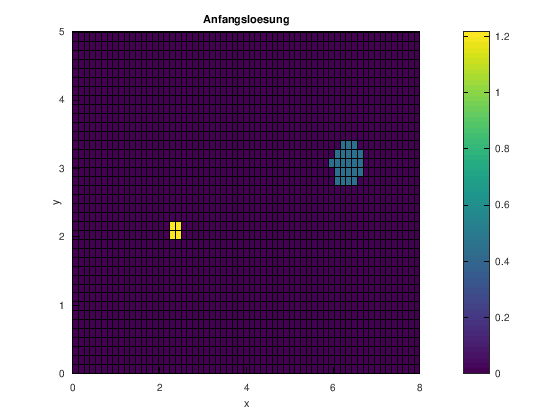

In [2]:
 for  i=1:N
  for j=1:M
   %%AH schlecht kallibriert
   %%initial(j,i)=0.01*initialfunction(x(j,i),y(j,i));
   %0.005 und 0.01 (in Tausend) d.h. 5 und 10 pro gegebene Fl�che pi*R^2
   
   % AH ich habe in meiner Modellierung in Einheiten Tausend EW/km2 gerechnet, Sie rechnen in EW/km2 und somit haben sie sehr geringe Anfangsbedingungen gewählt.
   % richtig wäre folgendes, was 10 und 5 Infizieren pro Kreis darstellen würde
   initial(j,i)=10*initialfunction(x(j,i),y(j,i));
  endfor  
  endfor

figure(Nr_timesteps+1);
  surface(x,y,initial*hx^2);
  % AH wenn Sie hier sol_matrix*hx^2 anstatt sol_matrix plotten, erhalten Sie die Zahlen der Infizierten pro Flaeche hx^2, aslp pro Pixel.
 
  title ("Anfangsloesung");
  colorbar
  ylabel("y")
  xlabel("x")

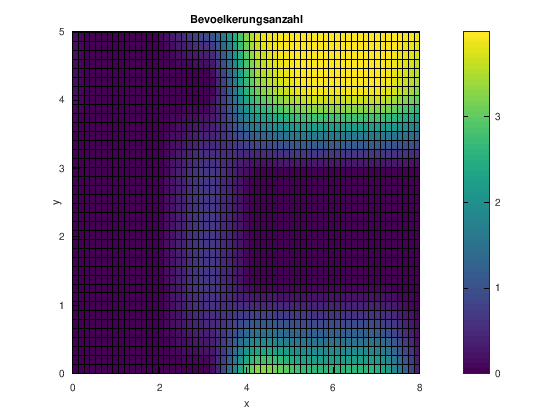

In [3]:
figure(Nr_timesteps+2);
 surface(x,y, (232/Max)*Sint.*hx^2)
 title ("Bevoelkerungsanzahl");
 ylabel("y")
 xlabel("x")
 colorbar

In [4]:
c

c =  0.32380


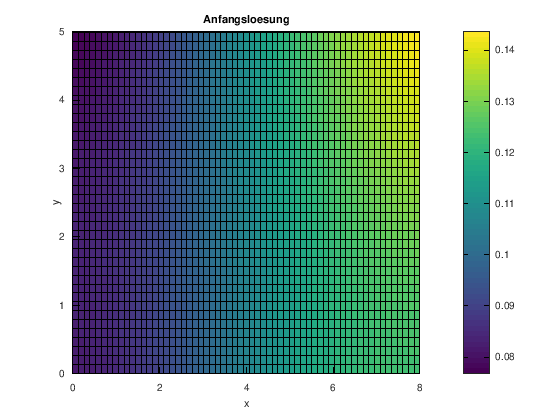

In [5]:
 sol_matrix=reshape(matrix_solution(:,Nr_timesteps),N,M);% Matrix mit N(Zeilen)x M(Spalten)
  sol_matrix=sol_matrix';
 
 figure(Nr_timesteps+11);
  surface(x,y,sol_matrix*hx^2);
  % AH wenn Sie hier sol_matrix*hx^2 anstatt sol_matrix plotten, erhalten Sie die Zahlen der Infizierten pro Flaeche hx^2, aslp pro Pixel.
 
  title ("Anfangsloesung");
  colorbar
  ylabel("y")
  xlabel("x")